In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from varclushi import VarClusHi
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from data_analysis import  rename_clc_codes, analysis_latex_table, significance_stars, print_features_by_correlation, print_features_by_spearman_correlation, print_features_by_r2, plot_correlations,data_analysis, calculate_nan_statistics , plot_log_distribution, plot_distribution_and_qq, calculate_correlation_matrix, calculate_correlation_with_p_value, perform_pca, variable_clustering, remove_underscores, custom_latex_format 

In [2]:
df = pd.read_csv('/gb_pv_capacity_model/data/20241127/processed/merged_nuts3_data.csv')
df

,nuts_cd,country_cd,nuts_name,year,date,capacity_mwp,111,112,121,122,...,gva_pounds_million_92_93,gva_pounds_million_S_94_96,gva_pounds_million_94,gva_pounds_million_95,gva_pounds_million_96,gva_pounds_million_T_97_98,national_capacity_mwp,ROC Buy-out Price (£),Obligation For England and Wales and Scotland (ROCs/MWh),country_area
0,UKM92,UK,Dumfries & Galloway,2010,2010-12-31,0.0,9.162842e+05,4.642536e+07,4.573867e+07,8.969180e+06,...,20.0,29.0,4.0,2.0,24.0,2.0,79.786102,36.99,0.111,2.445450e+11
1,UKM92,UK,Dumfries & Galloway,2011,2011-12-31,0.0,9.162842e+05,4.642536e+07,4.573867e+07,8.969180e+06,...,24.0,29.0,3.0,2.0,24.0,1.0,993.631467,38.69,0.124,2.445450e+11
2,UKM92,UK,Dumfries & Galloway,2012,2012-12-31,0.0,9.162842e+05,4.642536e+07,4.573867e+07,8.969180e+06,...,24.0,29.0,2.0,2.0,25.0,2.0,1778.962003,40.71,0.158,2.445450e+11
3,UKM92,UK,Dumfries & Galloway,2013,2013-12-31,0.0,9.162842e+05,4.642536e+07,4.573867e+07,8.969180e+06,...,26.0,30.0,2.0,2.0,27.0,1.0,2891.717265,42.02,0.206,2.445450e+11
4,UKM92,UK,Dumfries & Galloway,2014,2014-12-31,0.0,9.162842e+05,4.642536e+07,4.573867e+07,8.969180e+06,...,25.0,34.0,2.0,1.0,31.0,2.0,5364.097718,43.30,0.244,2.445450e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,UKM77,UK,Perth & Kinross and Stirling,2019,2019-12-31,0.0,1.193739e+06,7.178620e+07,2.105407e+07,4.023966e+05,...,42.0,122.0,9.0,4.0,109.0,10.0,13024.980325,48.78,0.484,2.445450e+11
2348,UKM77,UK,Perth & Kinross and Stirling,2020,2020-12-31,0.0,1.193739e+06,7.178620e+07,2.105407e+07,4.023966e+05,...,28.0,82.0,7.0,6.0,69.0,7.0,13421.966133,50.05,0.471,2.445450e+11
2349,UKM77,UK,Perth & Kinross and Stirling,2021,2021-12-31,0.0,1.193739e+06,7.178620e+07,2.105407e+07,4.023966e+05,...,23.0,74.0,12.0,4.0,59.0,6.0,13967.189838,50.80,0.492,2.445450e+11
2350,UKM77,UK,Perth & Kinross and Stirling,2022,2022-12-31,0.0,1.193739e+06,7.178620e+07,2.105407e+07,4.023966e+05,...,30.0,84.0,8.0,4.0,72.0,5.0,14995.536818,52.88,0.491,2.445450e+11


In [3]:
df = rename_clc_codes(df)

In [4]:
descriptive_statistics = df.describe()
descriptive_statistics

,year,capacity_mwp,1.1.1. Continuous urban fabric,1.1.2. Discontinuous urban fabric,1.2.1. Industrial or commercial units,1.2.2. Road and rail networks and associated land,1.2.3. Port areas,1.2.4. Airports,1.3.1. Mineral extraction sites,1.3.2. Dump sites,...,gva_pounds_million_92_93,gva_pounds_million_S_94_96,gva_pounds_million_94,gva_pounds_million_95,gva_pounds_million_96,gva_pounds_million_T_97_98,national_capacity_mwp,ROC Buy-out Price (£),Obligation For England and Wales and Scotland (ROCs/MWh),country_area
count,2352.000000,2352.000000,2.352000e+03,2.352000e+03,2.352000e+03,2.352000e+03,2.352000e+03,2.352000e+03,2.352000e+03,2.352000e+03,...,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2352.000000,2352.000000,2352.000000,2.352000e+03
mean,2016.500000,52.719780,1.788548e+06,7.790355e+07,1.483689e+07,9.573710e+05,6.410846e+05,2.077743e+06,3.214159e+06,2.880653e+05,...,93.371795,173.738553,46.363553,15.059066,112.294414,16.731227,9254.066711,46.080714,0.340357,2.445450e+11
std,4.031986,98.186081,2.009414e+06,4.646389e+07,1.066229e+07,1.461919e+06,1.288635e+06,3.528291e+06,5.549151e+06,5.686393e+05,...,105.599083,190.626596,130.305001,26.127295,86.237843,15.265391,5571.744910,5.704417,0.142344,6.104814e-05
min,2010.000000,0.000000,0.000000e+00,4.248290e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,79.786102,36.990000,0.111000,2.445450e+11
25%,2013.000000,2.971716,5.212035e+05,4.495253e+07,6.852240e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,37.000000,68.000000,7.000000,2.000000,52.000000,6.000000,2891.717265,42.020000,0.206000,2.445450e+11
50%,2016.500000,14.677354,1.217478e+06,6.739187e+07,1.188660e+07,4.053217e+05,0.000000e+00,4.022253e+05,1.152991e+06,0.000000e+00,...,60.000000,127.000000,17.000000,7.000000,90.000000,11.000000,12038.068242,45.175000,0.378500,2.445450e+11
75%,2020.000000,50.488980,2.393657e+06,9.672769e+07,2.037232e+07,1.220091e+06,6.509169e+05,2.712278e+06,3.877302e+06,3.455167e+05,...,104.000000,208.000000,37.000000,16.000000,147.000000,23.000000,13421.966133,50.050000,0.471000,2.445450e+11
max,2023.000000,746.628611,1.265351e+07,2.431953e+08,4.737381e+07,8.969180e+06,8.672581e+06,1.804847e+07,3.663765e+07,3.446711e+06,...,1053.000000,1945.000000,1627.000000,314.000000,611.000000,95.000000,16750.745028,59.010000,0.492000,2.445450e+11


In [5]:
descriptive_statistics_transposed=descriptive_statistics.transpose()
descriptive_statistics_transposed

,count,mean,std,min,25%,50%,75%,max
year,2352.0,2.016500e+03,4.031986e+00,2.010000e+03,2.013000e+03,2.016500e+03,2.020000e+03,2.023000e+03
capacity_mwp,2352.0,5.271978e+01,9.818608e+01,0.000000e+00,2.971716e+00,1.467735e+01,5.048898e+01,7.466286e+02
1.1.1. Continuous urban fabric,2352.0,1.788548e+06,2.009414e+06,0.000000e+00,5.212035e+05,1.217478e+06,2.393657e+06,1.265351e+07
1.1.2. Discontinuous urban fabric,2352.0,7.790355e+07,4.646389e+07,4.248290e+06,4.495253e+07,6.739187e+07,9.672769e+07,2.431953e+08
1.2.1. Industrial or commercial units,2352.0,1.483689e+07,1.066229e+07,0.000000e+00,6.852240e+06,1.188660e+07,2.037232e+07,4.737381e+07
...,...,...,...,...,...,...,...,...
gva_pounds_million_T_97_98,2184.0,1.673123e+01,1.526539e+01,0.000000e+00,6.000000e+00,1.100000e+01,2.300000e+01,9.500000e+01
national_capacity_mwp,2352.0,9.254067e+03,5.571745e+03,7.978610e+01,2.891717e+03,1.203807e+04,1.342197e+04,1.675075e+04
ROC Buy-out Price (£),2352.0,4.608071e+01,5.704417e+00,3.699000e+01,4.202000e+01,4.517500e+01,5.005000e+01,5.901000e+01
Obligation For England and Wales and Scotland (ROCs/MWh),2352.0,3.403571e-01,1.423436e-01,1.110000e-01,2.060000e-01,3.785000e-01,4.710000e-01,4.920000e-01


In [6]:

descriptive_statistics_transposed.index = descriptive_statistics_transposed.index.to_series().apply(remove_underscores)


In [7]:
# print(descriptive_statistics_t.to_latex(float_format="{:.1f}".format, longtable=True))
# print(descriptive_statistics_t.to_latex(float_format="{:.2e}".format, longtable=True))
print(descriptive_statistics_transposed.to_latex(float_format=custom_latex_format, longtable=True))

\begin{longtable}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
\endfirsthead
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
\endhead
\midrule
\multicolumn{9}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
year & $2.4\times 10^{3}$ & $2.0\times 10^{3}$ & 4.0 & $2.0\times 10^{3}$ & $2.0\times 10^{3}$ & $2.0\times 10^{3}$ & $2.0\times 10^{3}$ & $2.0\times 10^{3}$ \\
capacity mwp & $2.4\times 10^{3}$ & 52.7 & 98.2 & 0.0 & 3.0 & 14.7 & 50.5 & 746.6 \\
1.1.1. Continuous urban fabric & $2.4\times 10^{3}$ & $1.8\times 10^{6}$ & $2.0\times 10^{6}$ & 0.0 & $5.2\times 10^{5}$ & $1.2\times 10^{6}$ & $2.4\times 10^{6}$ & $1.3\times 10^{7}$ \\
1.1.2. Discontinuous urban fabric & $2.4\times 10^{3}$ & $7.8\times 10^{7}$ & $4.6\times 10^{7}$ & $4.2\times 10^{6}$ & $4.5\times 10^{7}$ & $6.7\times 10^{7}$ & $9.7\times 10^{7}$ & $2.4\times 10^{8}$ \\
1.2.1. Industrial or commercial units & $2.4\times 10^{3}$ & $1.5\

In [8]:
# # save to csv
# descriptive_statistics.to_csv('descriptive_statistics_by_nuts3.csv')

### Correlation Analysis

In [9]:
analysis = data_analysis(df, 'capacity_mwp')
analysis

/gb_pv_capacity_model/data_analysis/data_analysis.py:475: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p_value = pearsonr(data[column], data[target_column])
/gb_pv_capacity_model/data_analysis/data_analysis.py:480: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p_value = spearmanr(data[column], data[target_column])


,Feature,R-squared,Pearson Correlation,Pearson P-value,Spearman Correlation,Spearman P-value,Data Availability (%),Correlation Average
0,year,0.10,0.31,0.0000,0.45,0.0000,100.000000,0.380
1,1.1.1. Continuous urban fabric,0.00,-0.04,0.0444,0.04,0.0798,100.000000,0.000
2,1.1.2. Discontinuous urban fabric,0.22,0.47,0.0000,0.47,0.0000,100.000000,0.470
3,1.2.1. Industrial or commercial units,0.09,0.30,0.0000,0.23,0.0000,100.000000,0.265
4,1.2.2. Road and rail networks and associated land,0.01,0.09,0.0000,0.14,0.0000,100.000000,0.115
...,...,...,...,...,...,...,...,...
126,gva_pounds_million_T_97_98,0.14,0.37,0.0000,0.42,0.0000,92.857143,0.395
127,national_capacity_mwp,0.10,0.32,0.0000,0.45,0.0000,100.000000,0.385
128,ROC Buy-out Price (£),0.09,0.29,0.0000,0.45,0.0000,100.000000,0.370
129,Obligation For England and Wales and Scotland ...,0.10,0.31,0.0000,0.44,0.0000,100.000000,0.375


In [10]:
analysis_latex_table = analysis_latex_table(analysis)
analysis_latex_table

,Feature,Data Availability (%),R-squared,Pearson Correlation,Spearman Correlation,Correlation Average,Literature
130,country_area,100,0.00,nan,nan,nan,
107,gva_pounds_million_75,93,0.38,0.62***,0.58***,0.60,
61,air_temperature,90,0.15,0.38***,0.6***,0.49,
42,2.1. Arable land,100,0.32,0.56***,0.4***,0.48,
12,2.1.1. Non-irrigated arable land,100,0.32,0.56***,0.4***,0.48,
...,...,...,...,...,...,...,...
47,3.2. Scrub and/or herbaceous associations,100,0.01,-0.07***,0.0,-0.04,
36,5.2.3. Sea and ocean,100,0.00,-0.03,-0.06**,-0.04,
52,5.2. Marine waters,100,0.00,-0.0,-0.05*,-0.03,
23,3.2.4. Transitional woodland-scrub,100,0.01,-0.09***,0.04,-0.02,


In [11]:
# latex analysis table
first_column_name = analysis_latex_table.columns[0]
analysis_latex_table[first_column_name] = analysis_latex_table[first_column_name].apply(remove_underscores)
print(analysis_latex_table.to_latex(index=False, longtable=True))


\begin{longtable}{lllllll}
\toprule
Feature & Data Availability (%) & R-squared & Pearson Correlation & Spearman Correlation & Correlation Average & Literature \\
\midrule
\endfirsthead
\toprule
Feature & Data Availability (%) & R-squared & Pearson Correlation & Spearman Correlation & Correlation Average & Literature \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
country area & 100 & 0.00 & nan & nan & nan &  \\
gva pounds million 75 & 93 & 0.38 & 0.62*** & 0.58*** & 0.60 &  \\
air temperature & 90 & 0.15 & 0.38*** & 0.6*** & 0.49 &  \\
2.1. Arable land & 100 & 0.32 & 0.56*** & 0.4*** & 0.48 &  \\
2.1.1. Non-irrigated arable land & 100 & 0.32 & 0.56*** & 0.4*** & 0.48 &  \\
1.1.2. Discontinuous urban fabric & 100 & 0.22 & 0.47*** & 0.47*** & 0.47 &  \\
1.1. Urban fabric & 100 & 0.22 & 0.47*** & 0.47*** & 0.47 &  \\
1. Artificial Surfaces & 100 & 0.25 & 0.5*** & 0.43*** & 0.46 &  \\
2. Agricultural Areas & 100 & 0.3

/gb_pv_capacity_model/data_analysis/data_analysis.py:475: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p_value = pearsonr(data[column], data[target_column])
/gb_pv_capacity_model/data_analysis/data_analysis.py:480: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p_value = spearmanr(data[column], data[target_column])


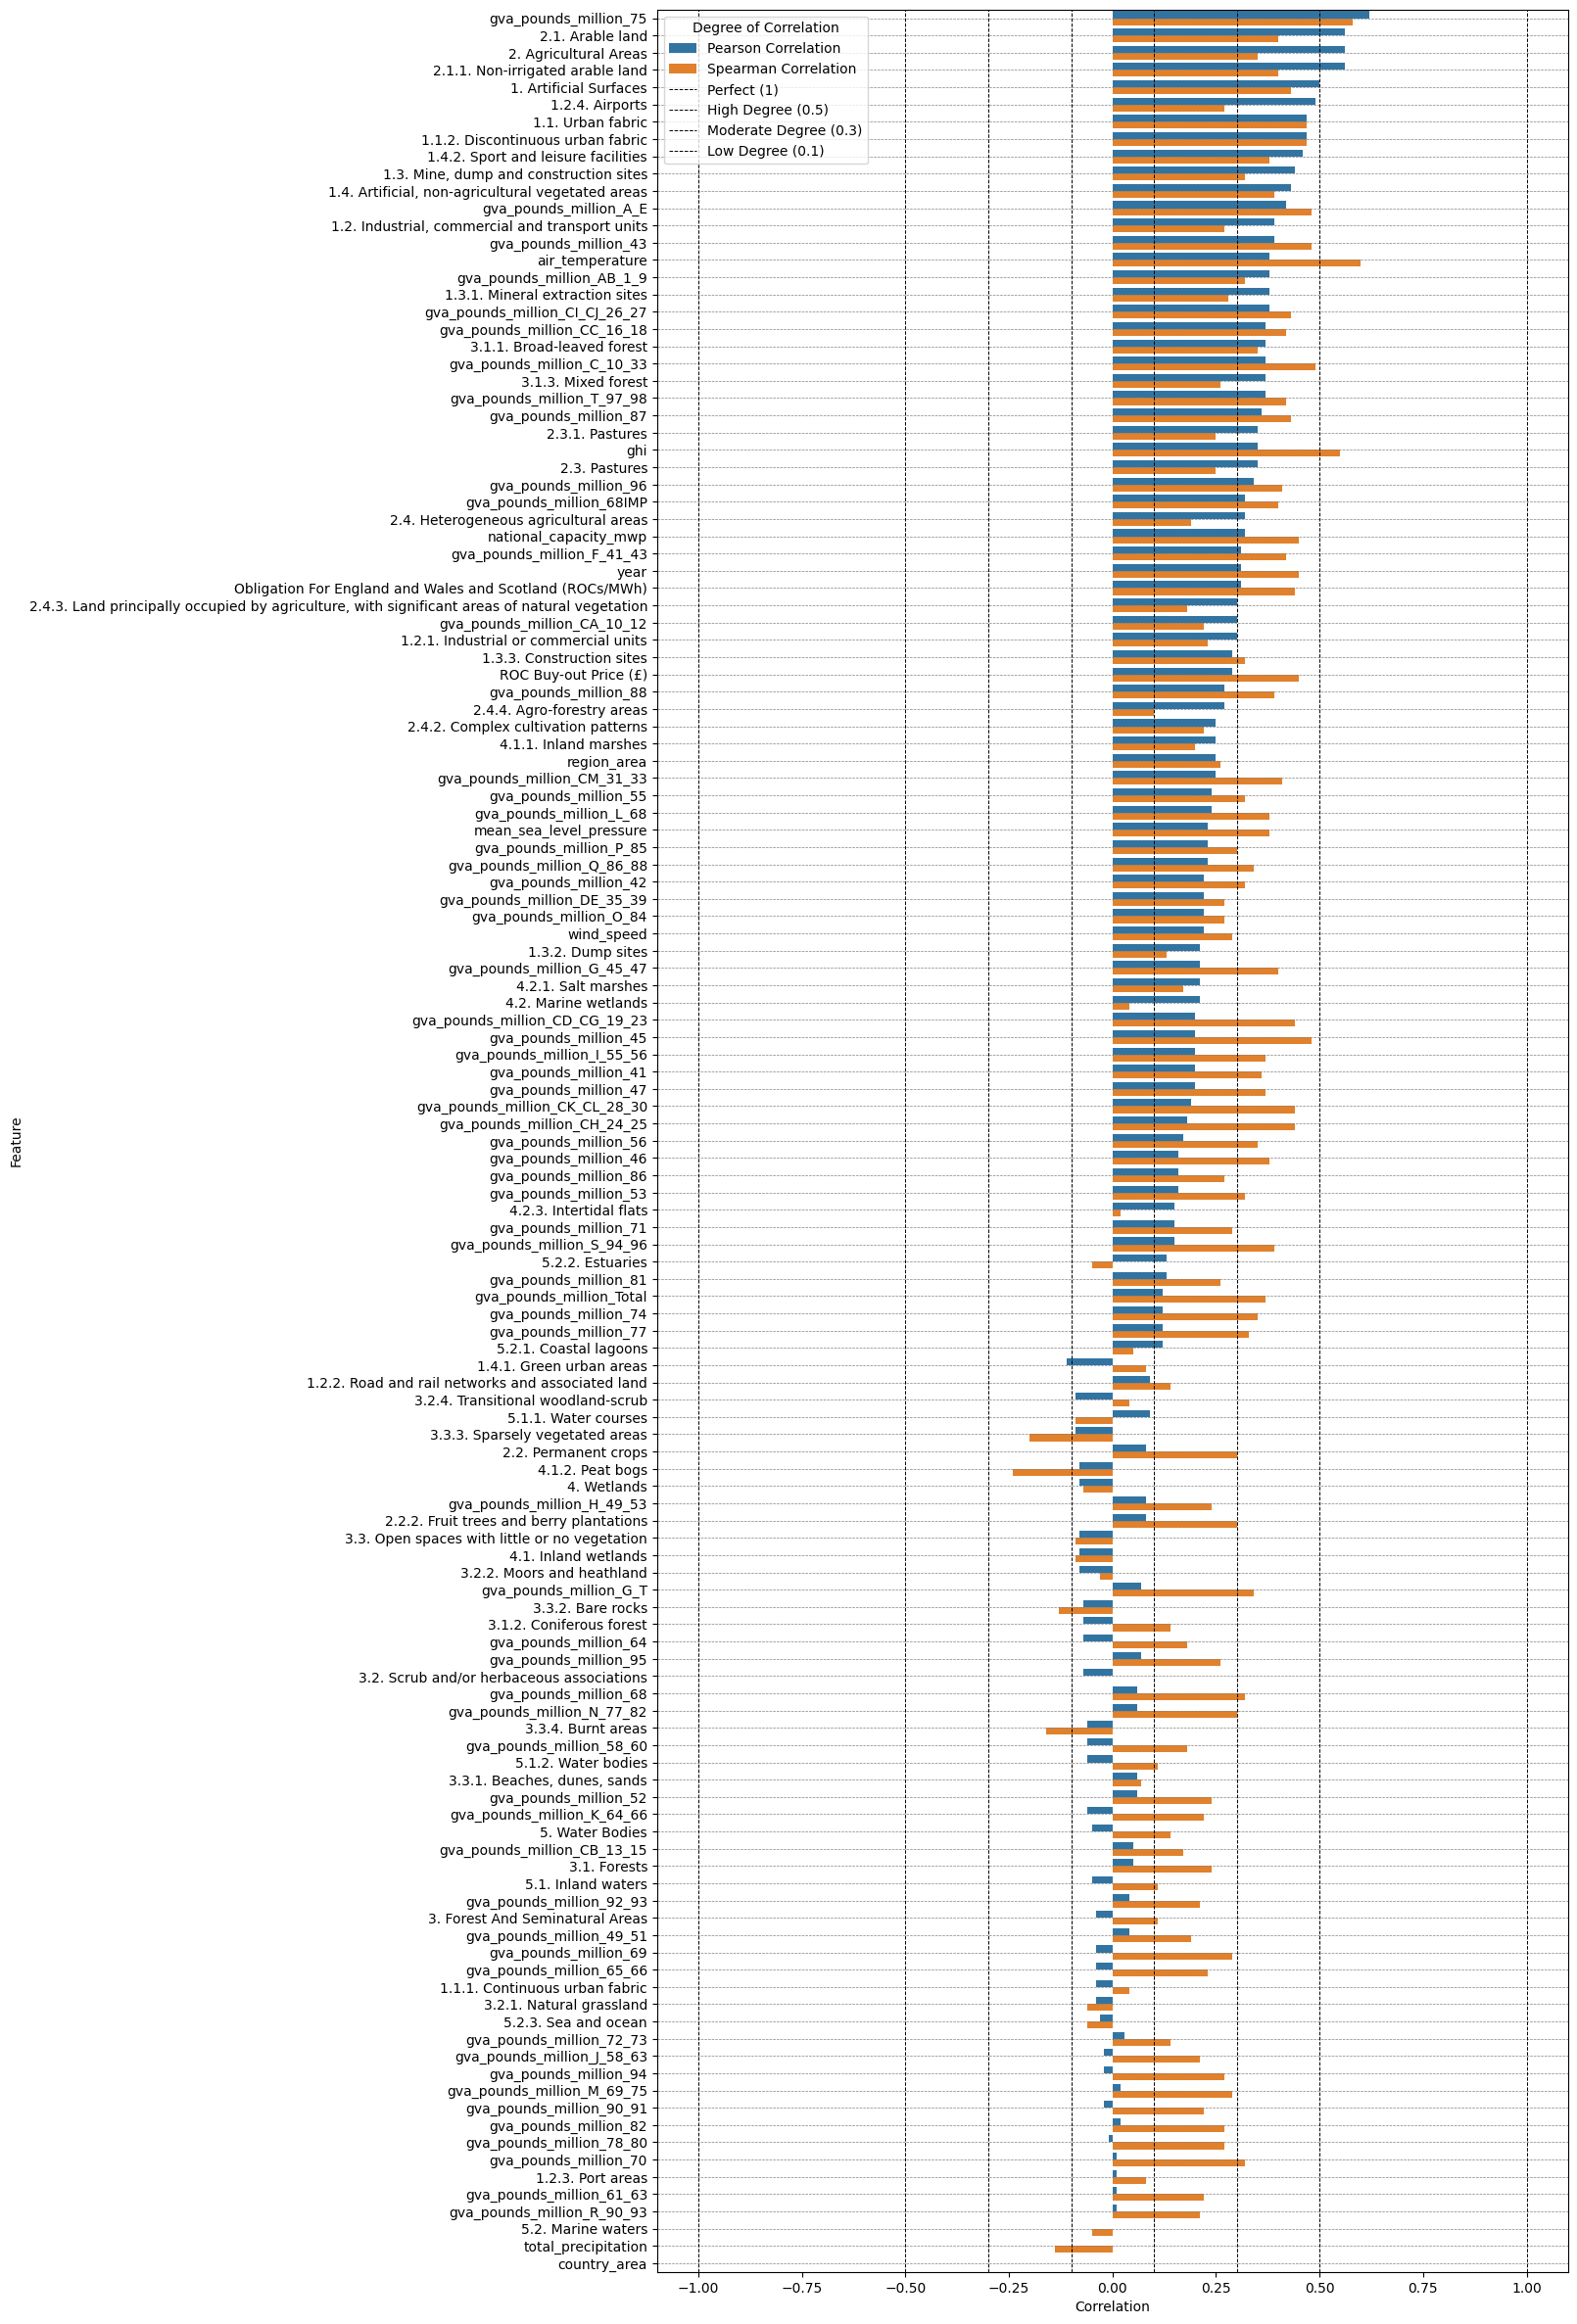

In [12]:
result_df = data_analysis(df, 'capacity_mwp')
plot_correlations(result_df)


In [13]:
print_features_by_correlation(result_df)

Features sorted by absolute Pearson correlation:
gva_pounds_million_75, 0.62
2.1. Arable land, 0.56
2. Agricultural Areas, 0.56
2.1.1. Non-irrigated arable land, 0.56
1. Artificial Surfaces, 0.5
1.2.4. Airports, 0.49
1.1. Urban fabric, 0.47
1.1.2. Discontinuous urban fabric, 0.47
1.4.2. Sport and leisure facilities, 0.46
1.3. Mine, dump and construction sites, 0.44
1.4. Artificial, non-agricultural vegetated areas, 0.43
gva_pounds_million_A_E, 0.42
1.2. Industrial, commercial and transport units, 0.39
gva_pounds_million_43, 0.39
air_temperature, 0.38
gva_pounds_million_AB_1_9, 0.38
1.3.1. Mineral extraction sites, 0.38
gva_pounds_million_CI_CJ_26_27, 0.38
gva_pounds_million_CC_16_18, 0.37
3.1.1. Broad-leaved forest, 0.37
gva_pounds_million_C_10_33, 0.37
3.1.3. Mixed forest, 0.37
gva_pounds_million_T_97_98, 0.37
gva_pounds_million_87, 0.36
2.3.1. Pastures, 0.35
ghi, 0.35
2.3. Pastures, 0.35
gva_pounds_million_96, 0.34
gva_pounds_million_68IMP, 0.32
2.4. Heterogeneous agricultural areas,

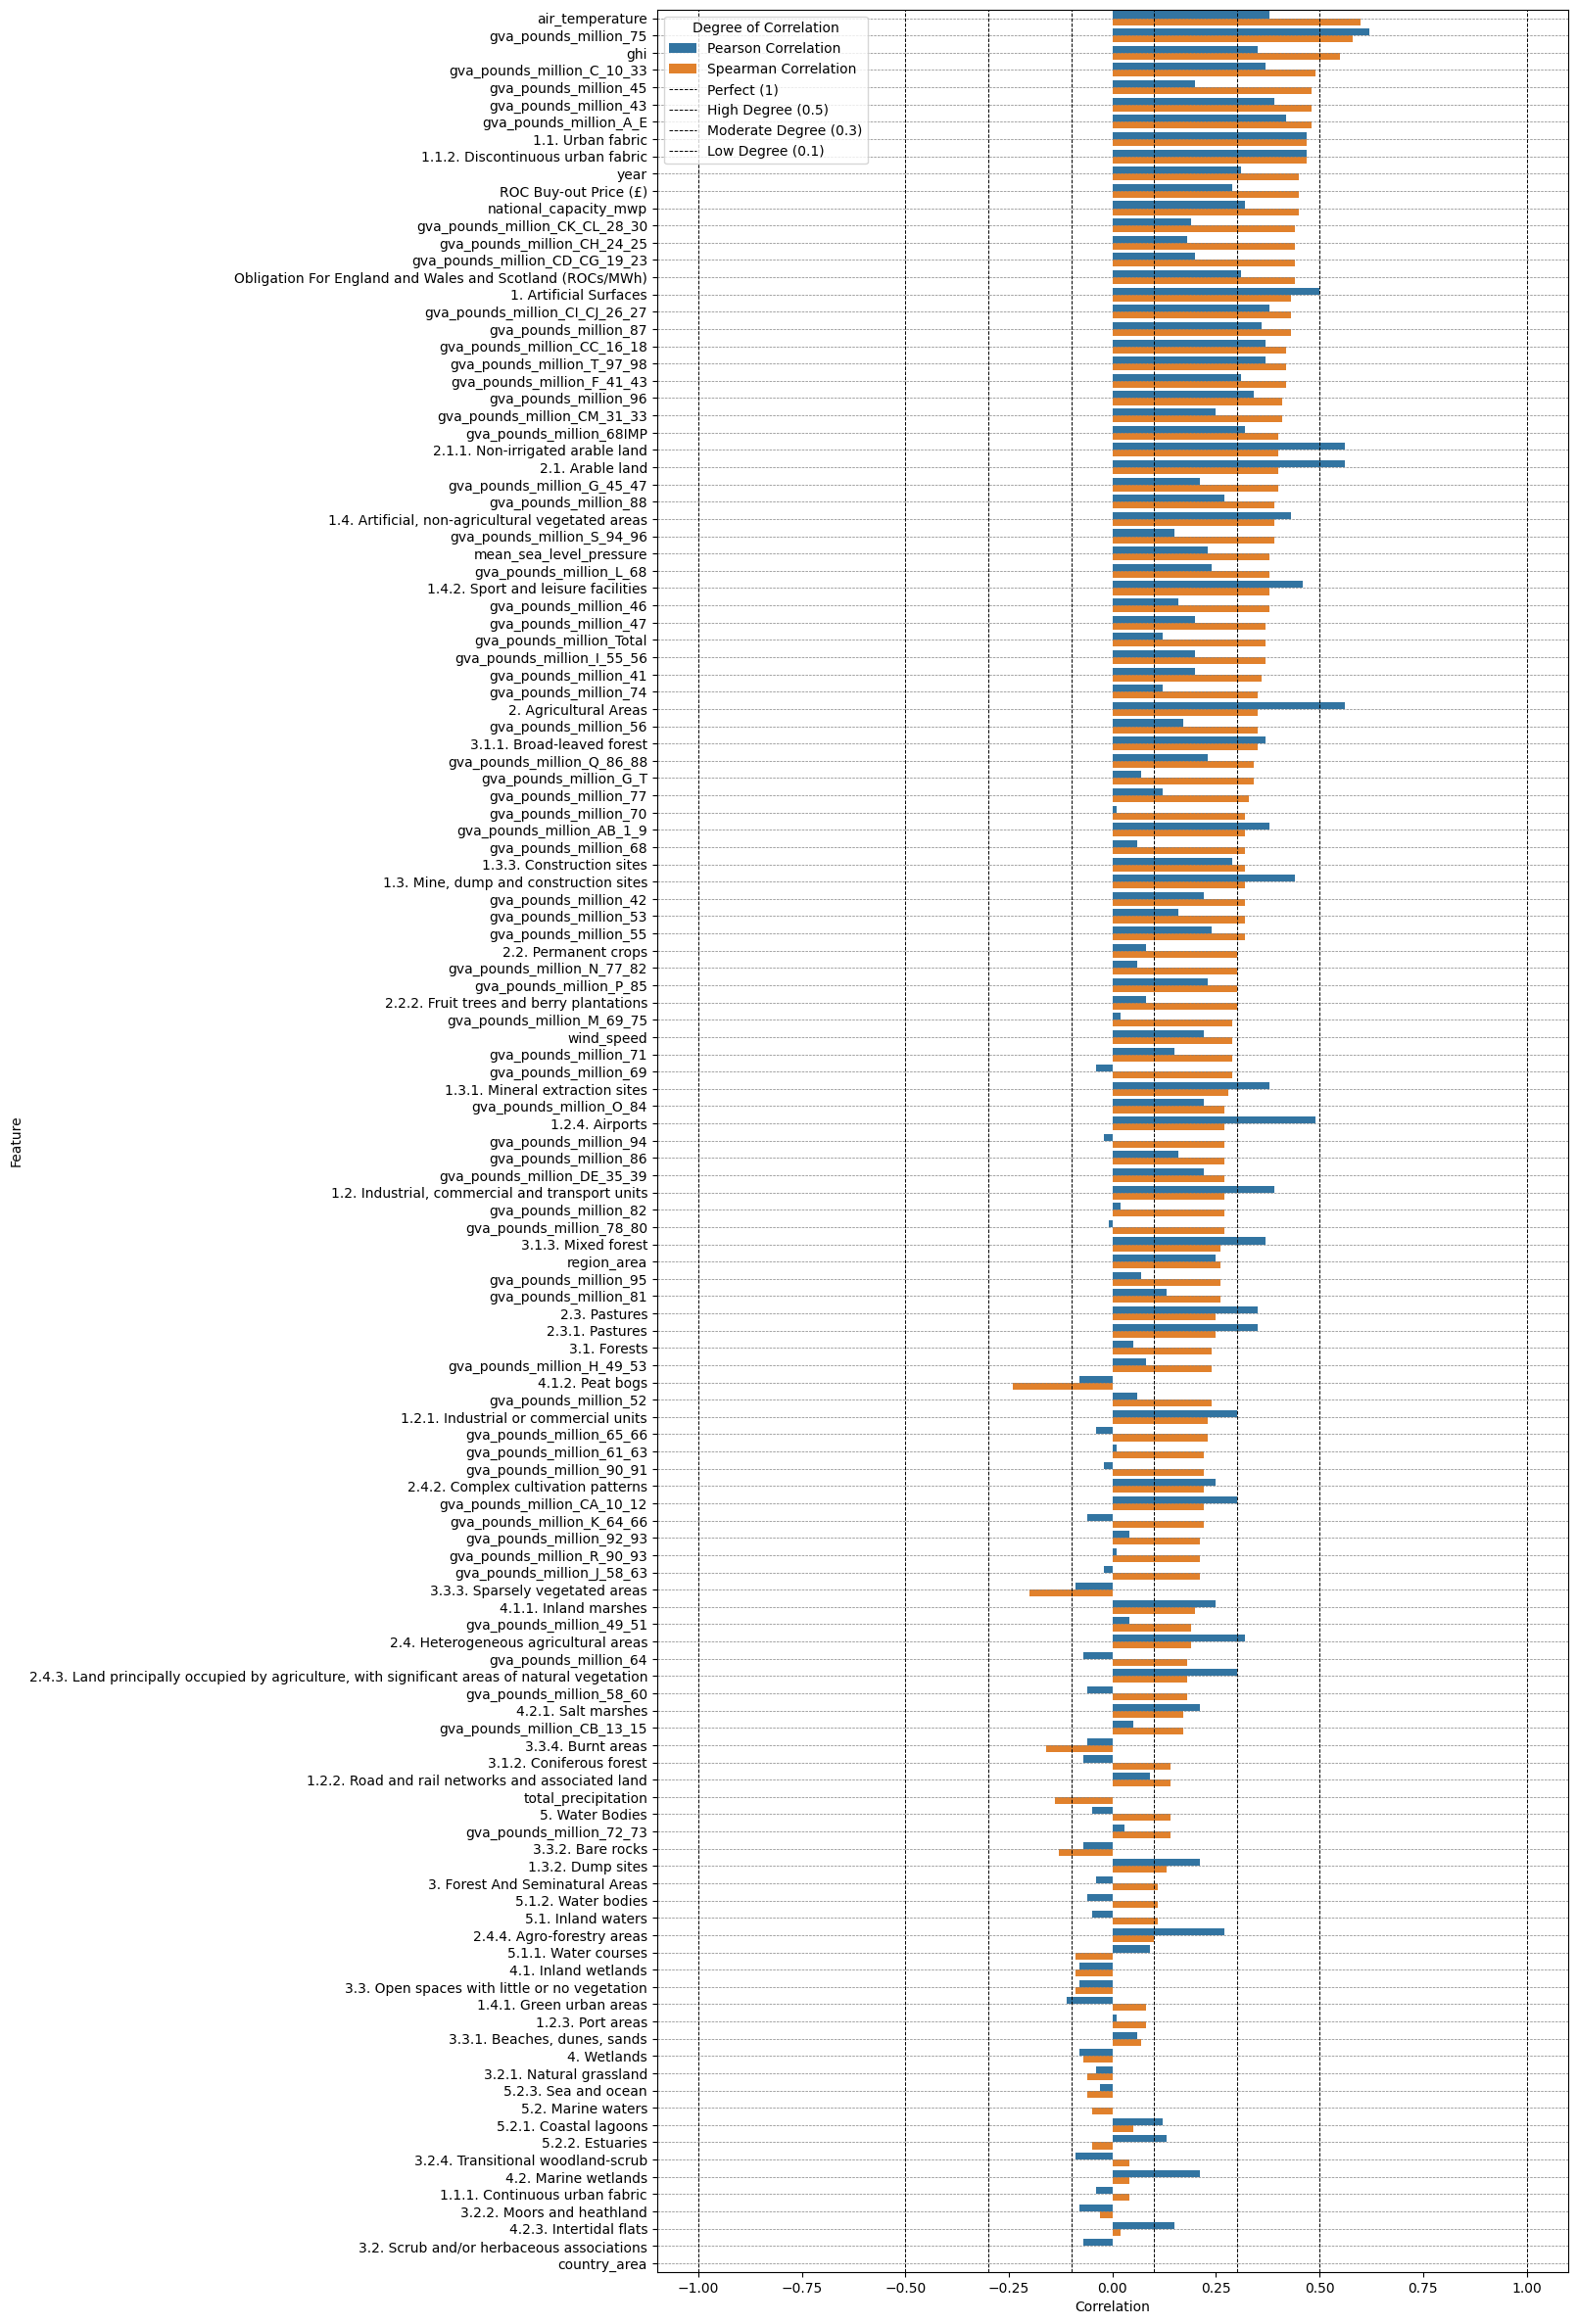

In [14]:

plot_correlations(result_df, 'Spearman')

In [15]:
print_features_by_spearman_correlation(result_df)

Features sorted by absolute Spearman correlation:
air_temperature
gva_pounds_million_75
ghi
gva_pounds_million_C_10_33
gva_pounds_million_45
gva_pounds_million_43
gva_pounds_million_A_E
1.1. Urban fabric
1.1.2. Discontinuous urban fabric
year
ROC Buy-out Price (£)
national_capacity_mwp
gva_pounds_million_CK_CL_28_30
gva_pounds_million_CH_24_25
gva_pounds_million_CD_CG_19_23
Obligation For England and Wales and Scotland (ROCs/MWh)
1. Artificial Surfaces
gva_pounds_million_CI_CJ_26_27
gva_pounds_million_87
gva_pounds_million_CC_16_18
gva_pounds_million_T_97_98
gva_pounds_million_F_41_43
gva_pounds_million_96
gva_pounds_million_CM_31_33
gva_pounds_million_68IMP
2.1.1. Non-irrigated arable land
2.1. Arable land
gva_pounds_million_G_45_47
gva_pounds_million_88
1.4. Artificial, non-agricultural vegetated areas
gva_pounds_million_S_94_96
mean_sea_level_pressure
gva_pounds_million_L_68
1.4.2. Sport and leisure facilities
gva_pounds_million_46
gva_pounds_million_47
gva_pounds_million_Total
gva_

In [16]:
print_features_by_r2(result_df)

Features sorted by R-squared:
gva_pounds_million_75, 0.38
2.1. Arable land, 0.32
2.1.1. Non-irrigated arable land, 0.32
2. Agricultural Areas, 0.31
1. Artificial Surfaces, 0.25
1.2.4. Airports, 0.24
1.1.2. Discontinuous urban fabric, 0.22
1.1. Urban fabric, 0.22
1.4.2. Sport and leisure facilities, 0.21
1.3. Mine, dump and construction sites, 0.19
1.4. Artificial, non-agricultural vegetated areas, 0.18
gva_pounds_million_A_E, 0.18
gva_pounds_million_AB_1_9, 0.15
gva_pounds_million_43, 0.15
air_temperature, 0.15
1.2. Industrial, commercial and transport units, 0.15
gva_pounds_million_CI_CJ_26_27, 0.14
3.1.1. Broad-leaved forest, 0.14
gva_pounds_million_CC_16_18, 0.14
3.1.3. Mixed forest, 0.14
gva_pounds_million_T_97_98, 0.14
1.3.1. Mineral extraction sites, 0.14
2.3.1. Pastures, 0.13
2.3. Pastures, 0.13
ghi, 0.13
gva_pounds_million_87, 0.13
gva_pounds_million_C_10_33, 0.13
gva_pounds_million_96, 0.12
gva_pounds_million_68IMP, 0.11
2.4. Heterogeneous agricultural areas, 0.1
national_capa

### PCA 

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['number'])

sc = StandardScaler()
df_std = sc.fit_transform(numeric_columns)

# Convert the standardized array back into a DataFrame
df_std = pd.DataFrame(df_std, columns=numeric_columns.columns)


In [18]:
df_std

,year,capacity_mwp,1.1.1. Continuous urban fabric,1.1.2. Discontinuous urban fabric,1.2.1. Industrial or commercial units,1.2.2. Road and rail networks and associated land,1.2.3. Port areas,1.2.4. Airports,1.3.1. Mineral extraction sites,1.3.2. Dump sites,...,gva_pounds_million_92_93,gva_pounds_million_S_94_96,gva_pounds_million_94,gva_pounds_million_95,gva_pounds_million_96,gva_pounds_million_T_97_98,national_capacity_mwp,ROC Buy-out Price (£),Obligation For England and Wales and Scotland (ROCs/MWh),country_area
0,-1.612452,-0.515738,-0.399476,-0.633001,2.987091,5.627792,-0.116873,-0.494216,0.333299,-0.509798,...,-0.669625,-0.733359,-0.323483,-0.480882,-0.967087,-0.921164,-1.646922,-1.593966,-1.611635,0.000031
1,-1.364382,-0.515738,-0.399476,-0.633001,2.987091,5.627792,-0.116873,-0.494216,0.333299,-0.509798,...,-0.631020,-0.733359,-0.331370,-0.480882,-0.967087,-0.987296,-1.482873,-1.295888,-1.520287,0.000031
2,-1.116313,-0.515738,-0.399476,-0.633001,2.987091,5.627792,-0.116873,-0.494216,0.333299,-0.509798,...,-0.631020,-0.733359,-0.339256,-0.480882,-0.955470,-0.921164,-1.341895,-0.941701,-1.281378,0.000031
3,-0.868243,-0.515738,-0.399476,-0.633001,2.987091,5.627792,-0.116873,-0.494216,0.333299,-0.509798,...,-0.611717,-0.728027,-0.339256,-0.480882,-0.932235,-0.987296,-1.142138,-0.712006,-0.944094,0.000031
4,-0.620174,-0.515738,-0.399476,-0.633001,2.987091,5.627792,-0.116873,-0.494216,0.333299,-0.509798,...,-0.621368,-0.706701,-0.339256,-0.520092,-0.885765,-0.921164,-0.698308,-0.487571,-0.677077,0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,0.620174,-0.515738,-0.280513,-0.081426,0.634056,-0.355400,-0.491636,-0.252969,-0.097698,-0.509798,...,-0.457296,-0.237513,-0.284050,-0.402462,0.020394,-0.392105,0.676936,0.473293,1.009342,0.000031
2502,0.868243,-0.515738,-0.280513,-0.081426,0.634056,-0.355400,-0.491636,-0.252969,-0.097698,-0.509798,...,-0.592414,-0.450780,-0.299823,-0.324042,-0.444303,-0.590502,0.748201,0.695975,0.917994,0.000031
2503,1.116313,-0.515738,-0.280513,-0.081426,0.634056,-0.355400,-0.491636,-0.252969,-0.097698,-0.509798,...,-0.640671,-0.493433,-0.260391,-0.402462,-0.560477,-0.656634,0.846077,0.827480,1.065556,0.000031
2504,1.364382,-0.515738,-0.280513,-0.081426,0.634056,-0.355400,-0.491636,-0.252969,-0.097698,-0.509798,...,-0.573112,-0.440117,-0.291937,-0.402462,-0.409451,-0.722767,1.030681,1.192187,1.058529,0.000031


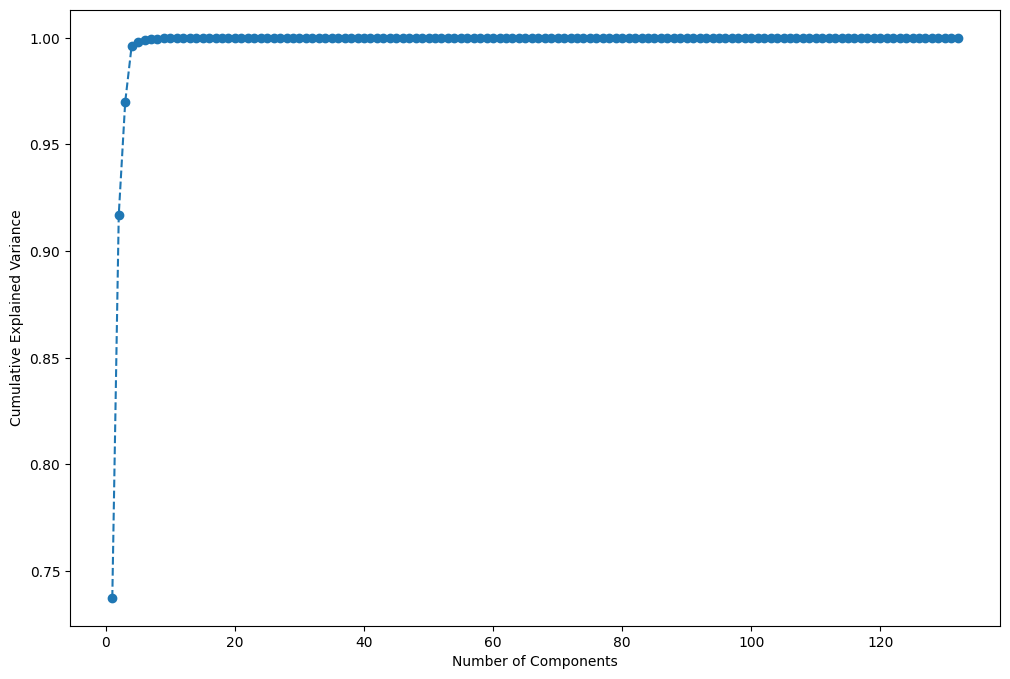

In [32]:
transformed_df, pca, columns_used, correlations, explained_variance_ratio, loadings= perform_pca(numeric_columns)

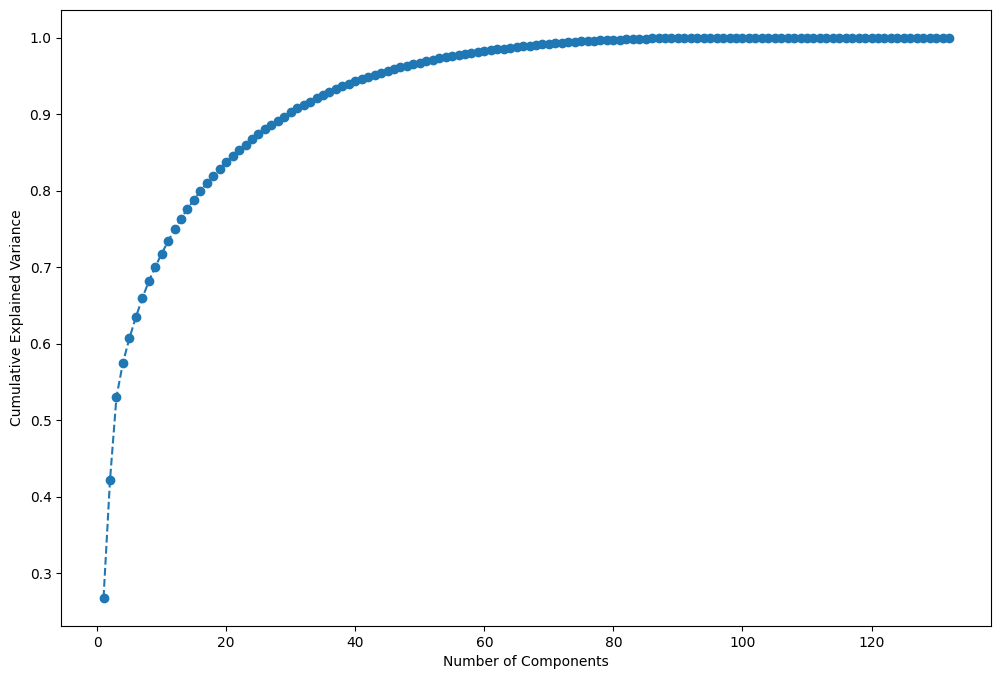

In [20]:
transformed_df1, pca1, columns_used1, correlations1, explained_variance_ratio1, loadings1= perform_pca(df_std)

In [21]:
transformed_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132
0,6.451743e+09,1.778081e+08,1.932900e+09,1.353384e+09,-3.336154e+08,-7.413049e+07,-2.816178e+08,2.866277e+08,-1.027955e+07,-7.667837e+07,...,-0.024366,8.649249,0.137418,-0.072090,-0.126188,-0.314955,0.595822,-4.168297,-5.453759,-0.091003
1,6.451743e+09,1.778081e+08,1.932900e+09,1.353384e+09,-3.336154e+08,-7.413049e+07,-2.816178e+08,2.866277e+08,-1.027955e+07,-7.667837e+07,...,0.012105,8.692349,0.059765,-0.173666,0.048813,-0.546509,2.094910,-7.558915,-3.667806,-0.090973
2,6.451743e+09,1.778081e+08,1.932900e+09,1.353384e+09,-3.336154e+08,-7.413049e+07,-2.816178e+08,2.866277e+08,-1.027955e+07,-7.667837e+07,...,-0.004054,2.699582,0.061429,-0.060696,-0.044753,-0.252942,1.124330,-4.216494,-2.030009,-0.090973
3,6.451743e+09,1.778081e+08,1.932900e+09,1.353384e+09,-3.336154e+08,-7.413049e+07,-2.816178e+08,2.866277e+08,-1.027955e+07,-7.667837e+07,...,-0.014582,0.873029,0.085535,-0.030954,-0.112723,-0.218251,1.109687,-4.464400,-2.348640,-0.090973
4,6.451743e+09,1.778081e+08,1.932900e+09,1.353384e+09,-3.336154e+08,-7.413049e+07,-2.816178e+08,2.866277e+08,-1.027955e+07,-7.667837e+07,...,-0.015150,-2.856414,0.115855,-0.100868,-0.079627,-0.411208,3.290327,-6.968374,5.522569,-0.090973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,8.009210e+09,-1.370442e+09,7.334332e+08,2.586331e+09,4.071755e+08,2.610479e+08,3.397704e+08,-4.691383e+07,1.075111e+08,-1.482656e+08,...,-0.055828,-2.468739,0.126970,0.120939,-0.250729,0.247633,-1.059592,2.530686,-0.011560,-0.231079
2102,8.009210e+09,-1.370442e+09,7.334332e+08,2.586331e+09,4.071755e+08,2.610479e+08,3.397704e+08,-4.691383e+07,1.075111e+08,-1.482656e+08,...,-0.045734,3.128492,0.144736,0.032379,-0.211315,-0.017310,-0.335899,-1.022087,-3.039192,-0.231079
2103,8.009210e+09,-1.370442e+09,7.334332e+08,2.586331e+09,4.071755e+08,2.610479e+08,3.397704e+08,-4.691383e+07,1.075111e+08,-1.482656e+08,...,-0.016683,0.092667,-0.002022,-0.029122,0.092727,-0.050515,0.774682,-1.578119,2.645526,-0.231049
2104,8.009210e+09,-1.370442e+09,7.334332e+08,2.586331e+09,4.071755e+08,2.610479e+08,3.397704e+08,-4.691383e+07,1.075111e+08,-1.482656e+08,...,-0.016934,-2.842646,0.018233,0.022161,-0.019692,0.081917,-0.140345,1.217076,1.536796,-0.231079


In [22]:
pca

PCA()

In [23]:
# columns_used

In [24]:
# correlations

In [25]:
explained_variance_ratio1

array([2.67622241e-01, 1.53753409e-01, 1.08771133e-01, 4.44608594e-02,
       3.21912898e-02, 2.76280771e-02, 2.47234478e-02, 2.20542838e-02,
       1.89040534e-02, 1.74300005e-02, 1.63468460e-02, 1.53328518e-02,
       1.42116839e-02, 1.29012142e-02, 1.17352878e-02, 1.12681945e-02,
       1.03104378e-02, 9.43019967e-03, 9.17135858e-03, 8.68249906e-03,
       8.32507940e-03, 7.65675142e-03, 7.17439291e-03, 6.98053331e-03,
       6.67384532e-03, 6.43901400e-03, 5.82782136e-03, 5.56671471e-03,
       5.38206908e-03, 5.34148976e-03, 5.13896630e-03, 4.69999751e-03,
       4.39641968e-03, 4.27552761e-03, 4.09092913e-03, 3.98590618e-03,
       3.76348890e-03, 3.65623655e-03, 3.46148282e-03, 3.18545668e-03,
       3.02241347e-03, 2.77980073e-03, 2.74448536e-03, 2.61377611e-03,
       2.47221655e-03, 2.36378303e-03, 2.35085819e-03, 2.23301937e-03,
       2.00347884e-03, 1.91599356e-03, 1.84102047e-03, 1.81732766e-03,
       1.75647260e-03, 1.57524157e-03, 1.47342679e-03, 1.40088836e-03,
      

In [26]:
explained_variance_ratio

array([7.37512284e-01, 1.79453658e-01, 5.29584800e-02, 2.63067528e-02,
       1.54337248e-03, 9.95666120e-04, 6.20889742e-04, 1.95067267e-04,
       1.77384412e-04, 8.46276516e-05, 3.94456833e-05, 3.15681879e-05,
       1.74361532e-05, 1.49462011e-05, 1.18074958e-05, 9.52774013e-06,
       7.49694055e-06, 5.25449766e-06, 4.51246407e-06, 3.33155446e-06,
       1.98257845e-06, 1.16755565e-06, 8.12453224e-07, 7.27993400e-07,
       5.75575526e-07, 2.56720532e-07, 2.16841470e-07, 1.99992299e-07,
       1.70899030e-07, 1.33756093e-07, 1.11655032e-07, 8.49498549e-08,
       2.73181519e-08, 1.69479113e-08, 5.30370012e-09, 1.37404433e-10,
       1.02864542e-10, 1.43104722e-11, 2.69855881e-12, 3.24079904e-13,
       5.24875691e-14, 4.27282465e-14, 2.24757010e-14, 1.32392575e-14,
       1.14714966e-14, 9.55177300e-15, 9.22994743e-15, 8.65607155e-15,
       6.09152972e-15, 4.63903918e-15, 4.45062471e-15, 3.42698841e-15,
       3.28442108e-15, 2.23735203e-15, 1.83000059e-15, 1.72728575e-15,
      

In [27]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132
year,-4.366905e-22,3.786544e-21,-2.538533e-20,8.368480e-21,-8.435321e-18,-1.128172e-17,4.085011e-17,1.562793e-17,-7.545790e-17,2.543531e-17,...,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-5.321757e-10
capacity_mwp,7.245801e-09,3.675458e-08,-1.898036e-08,-2.193982e-08,-8.981302e-08,-1.610220e-07,9.170750e-08,-3.433162e-07,-5.107461e-08,-1.053392e-07,...,0.000104,-0.049637,0.000392,-0.001452,0.000527,-0.004702,0.038144,-0.072101,0.071149,8.172748e-09
1.1.1. Continuous urban fabric,-1.124088e-04,-3.963039e-08,-5.243488e-05,8.770817e-05,-1.403497e-03,-9.679786e-04,3.816618e-03,1.847414e-03,-5.048924e-03,1.023687e-03,...,0.132108,-0.046414,-0.032339,0.026924,0.080673,0.118941,0.103659,-0.130503,-0.024356,1.601358e-05
1.1.2. Discontinuous urban fabric,2.538243e-03,1.703500e-02,-1.265320e-02,-2.665228e-03,-1.484631e-01,-1.488903e-01,3.667668e-01,8.958288e-02,-6.555088e-02,1.881732e-02,...,0.132108,-0.046416,-0.032339,0.026924,0.080673,0.118942,0.103659,-0.130502,-0.024355,1.600199e-05
1.2.1. Industrial or commercial units,1.492878e-03,1.740752e-03,-2.149878e-03,1.533626e-03,-2.829530e-02,-1.014685e-02,4.192128e-02,9.358823e-02,-2.098702e-03,5.275329e-02,...,0.197857,-0.060368,-0.113109,0.085993,-0.094022,0.131679,0.155155,-0.142076,-0.097650,5.613666e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gva_pounds_million_T_97_98,2.662897e-10,3.875941e-09,-4.324177e-09,-6.419154e-10,-3.358687e-08,-3.539370e-08,5.306235e-08,-4.861098e-08,-1.442053e-08,-4.311938e-08,...,-0.010151,0.106695,0.036930,0.007868,-0.054230,-0.004817,0.012529,-0.027080,0.000595,2.142187e-10
national_capacity_mwp,-5.391286e-19,5.380278e-18,-3.516059e-17,1.214324e-17,-1.143858e-14,-1.527820e-14,5.532059e-14,2.139166e-14,-1.020741e-13,3.576450e-14,...,-0.000005,0.000348,0.000012,0.000004,-0.000015,0.000005,-0.000064,0.000106,-0.000133,4.979057e-09
ROC Buy-out Price (£),-4.867155e-22,4.846637e-21,-3.172701e-20,1.101416e-20,-1.033434e-17,-1.379265e-17,4.992505e-17,1.931042e-17,-9.223270e-17,3.215206e-17,...,0.007370,-0.479101,-0.023111,0.000051,0.026190,0.011849,-0.030161,0.065009,-0.001186,2.457010e-11
Obligation For England and Wales and Scotland (ROCs/MWh),-1.462025e-23,1.461369e-22,-9.555710e-22,3.304599e-22,-3.111930e-19,-4.155000e-19,1.504401e-18,5.820965e-19,-2.776662e-18,9.712947e-19,...,-0.000321,-0.006389,0.000780,0.000273,-0.001135,0.000144,-0.000387,0.000840,-0.000007,-4.000010e-13


### Variable Clustering

In [37]:
info_df, rsquare_df = variable_clustering(numeric_columns, maxeigval2=1, maxclus=4)


In [38]:
info_df

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,41,26.759480,3.882003,0.652670
1,1,31,16.938006,2.814191,0.546387
2,2,43,16.393981,4.142804,0.381255
3,3,16,7.058127,2.048191,0.441133


In [39]:
rsquare_df

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,1.1.1. Continuous urban fabric,0.306621,0.033439,0.717367
1,0,gva_pounds_million_Total,0.958389,0.291076,0.058696
2,0,gva_pounds_million_41,0.719805,0.431773,0.493105
3,0,gva_pounds_million_G_T,0.952101,0.199783,0.059858
4,0,gva_pounds_million_G_45_47,0.667206,0.540815,0.724748
...,...,...,...,...,...
126,3,2.4. Heterogeneous agricultural areas,0.388587,0.093046,0.674138
127,3,4.2. Marine wetlands,0.254446,0.169925,0.898176
128,3,2. Agricultural Areas,0.830257,0.173914,0.205478
129,3,gva_pounds_million_AB_1_9,0.425616,0.134685,0.663785


In [40]:
# Merge the two DataFrames on the 'Feature' and 'Variable' columns
merged_df = pd.merge(result_df, rsquare_df, left_on='Feature', right_on='Variable', how='left')

# Drop the duplicate 'Variable' column
merged_df.drop('Variable', axis=1, inplace=True)

# Print the resulting DataFrame
merged_df

,Feature,R-squared,Pearson Correlation,Pearson P-value,Spearman Correlation,Spearman P-value,Data Availability (%),Correlation Average,Cluster,RS_Own,RS_NC,RS_Ratio
0,year,0.09,0.30,0.0000,0.40,0.0000,100.000000,0.350,2.0,0.033839,0.013524,0.979406
1,1.1.1. Continuous urban fabric,0.00,-0.05,0.0176,0.04,0.0757,100.000000,-0.005,0.0,0.306621,0.033439,0.717367
2,1.1.2. Discontinuous urban fabric,0.23,0.48,0.0000,0.51,0.0000,100.000000,0.495,2.0,0.839885,0.179178,0.195066
3,1.2.1. Industrial or commercial units,0.10,0.31,0.0000,0.26,0.0000,100.000000,0.285,3.0,0.278463,0.317485,1.057174
4,1.2.2. Road and rail networks and associated land,0.01,0.10,0.0000,0.18,0.0000,100.000000,0.140,2.0,0.116462,0.065816,0.945786
...,...,...,...,...,...,...,...,...,...,...,...,...
126,gva_pounds_million_T_97_98,0.15,0.39,0.0000,0.49,0.0000,92.857143,0.440,2.0,0.509542,0.278774,0.680033
127,national_capacity_mwp,0.10,0.31,0.0000,0.40,0.0000,100.000000,0.355,2.0,0.032497,0.012551,0.979801
128,ROC Buy-out Price (£),0.08,0.28,0.0000,0.40,0.0000,100.000000,0.340,2.0,0.033262,0.013358,0.979827
129,Obligation For England and Wales and Scotland ...,0.09,0.30,0.0000,0.39,0.0000,100.000000,0.345,2.0,0.033364,0.012903,0.979271
